## Time Series Implementation

1. Data Ingesiton

2. Eda of the data

3. processing of the data

4. model building

5. model evalution

# Data Ingestion

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Check the datatype of the index and convert it to datetime if necessary.

Set the datetime column as the index of the dataframe.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
data=pd.read_csv("TSLA.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
data.shape

(758, 8)

In [5]:
stock_data = data[["Date","Close"]]

In [6]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [7]:
stock_data.shape

(758, 2)

In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [9]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [11]:
stock_data=stock_data.set_index("Date")

In [12]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


## why we are converting date column as a index column

1. we can easily retrive the data
2. visulization is also simple
3. those lib has been designed in such a way it required date column as a index(scipy statsmodel)

## EDA(exploratory data analysis)

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

In [13]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


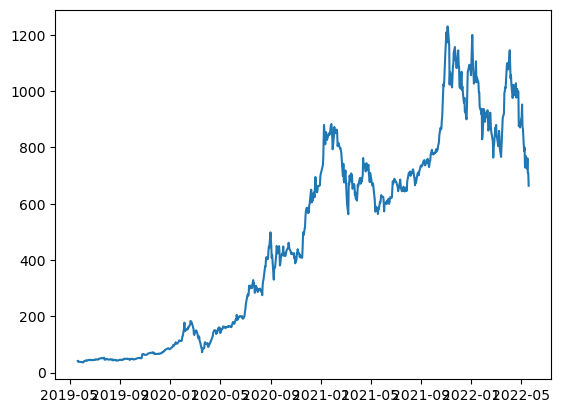

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

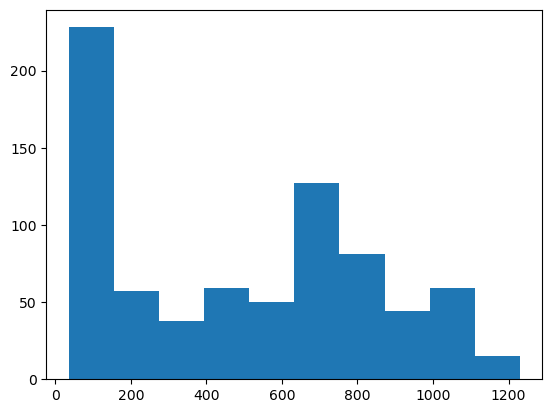

In [15]:
plt.hist(stock_data.Close)

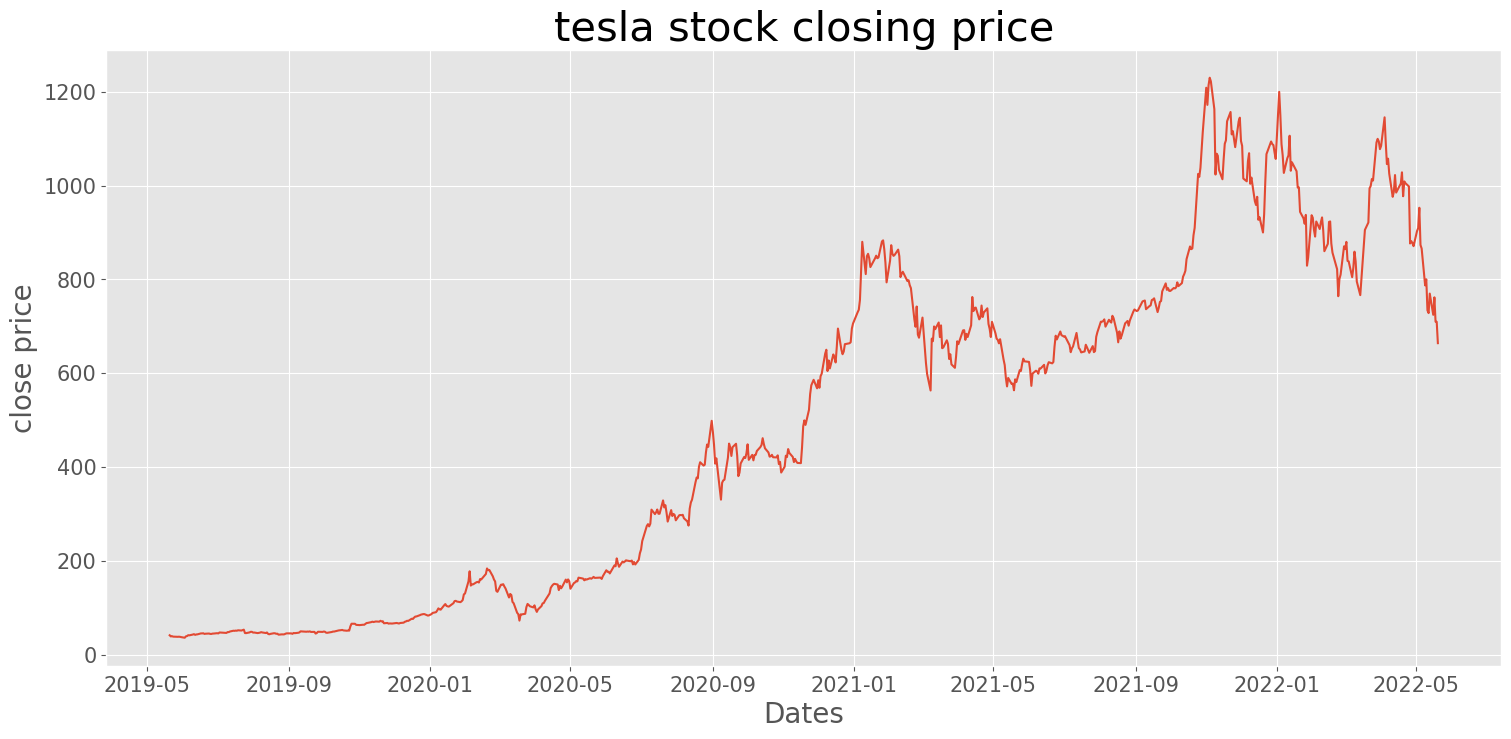

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data["Close"])
plt.title("tesla stock closing price",fontsize=30)
plt.show()

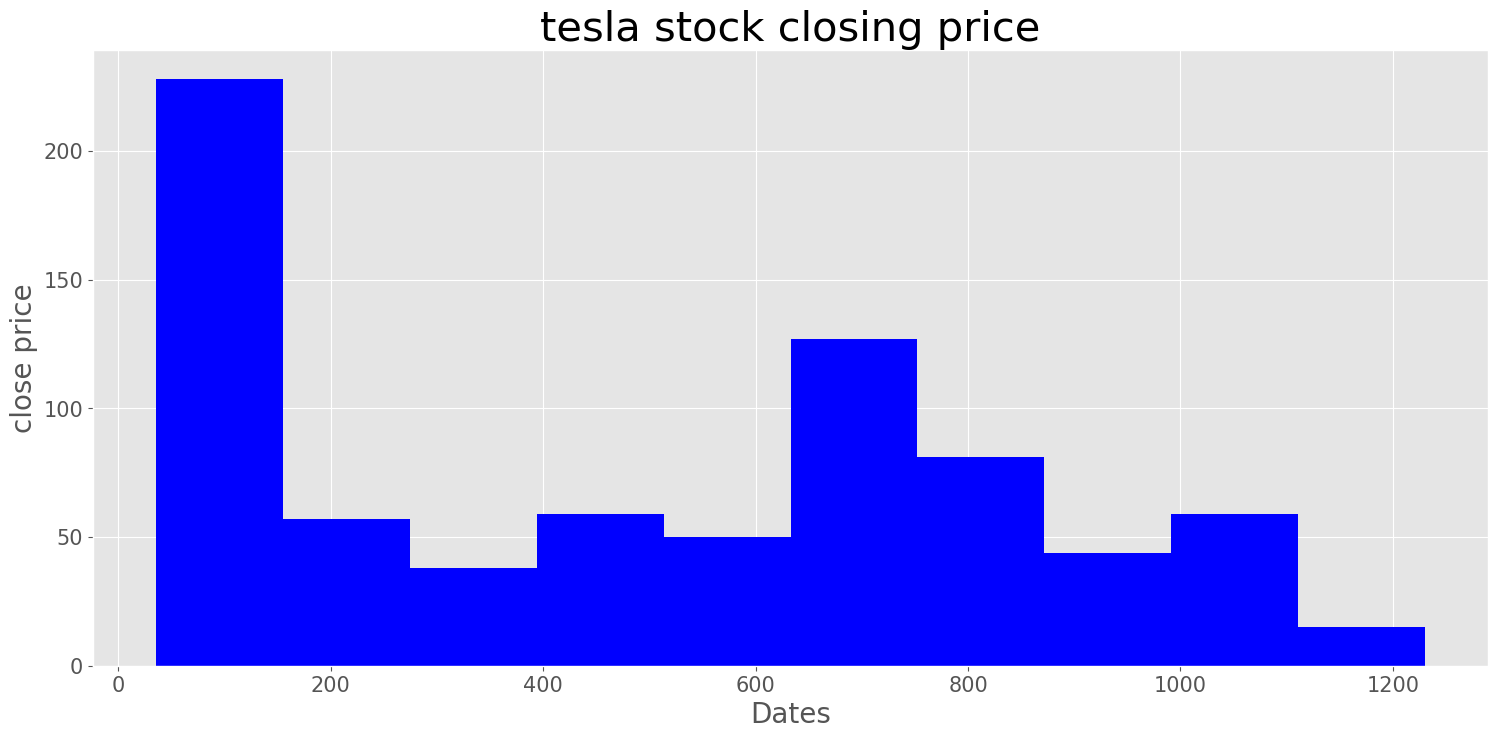

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title("tesla stock closing price",fontsize=30)
plt.show()

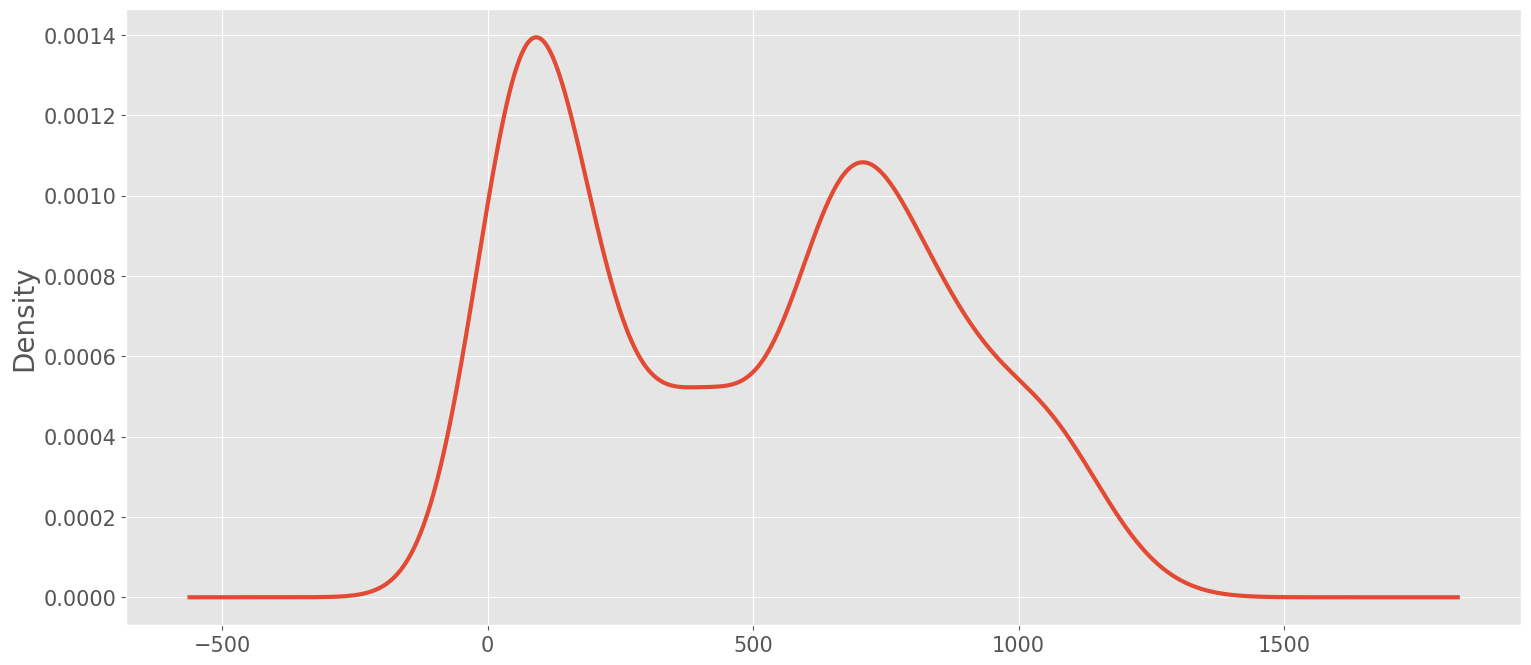

In [18]:
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

### rolling()
The rolling method of a pandas DataFrame returns a Rolling object that provides the feature of rolling window calculations.

The concept of rolling window calculation is most primarily used in signal processing and time-series data. In very simple words, we take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time

`DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)`

- `window`: The size of the moving window. This is the number of observations used for calculating the statistic. Each window will be a fixed size. I


In [22]:
### rolling()
stock_data["Close"].rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [24]:
stock_data["Close"].rolling(12).mean() #moving average

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    826.467504
2022-05-17    817.371668
2022-05-18    801.277501
2022-05-19    784.625000
2022-05-20    760.565002
Name: Close, Length: 758, dtype: float64

In [25]:
rolmean=stock_data["Close"].rolling(365).mean() #rolling mean - to smoothening the curve

In [27]:
stock_data["Close"].rolling(3).std() #rolling std. deviation

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23     1.296425
2019-05-24     0.487492
2019-05-28     0.699754
                ...    
2022-05-16    25.125547
2022-05-17    24.136242
2022-05-18    26.714694
2022-05-19    30.019958
2022-05-20    26.394268
Name: Close, Length: 758, dtype: float64

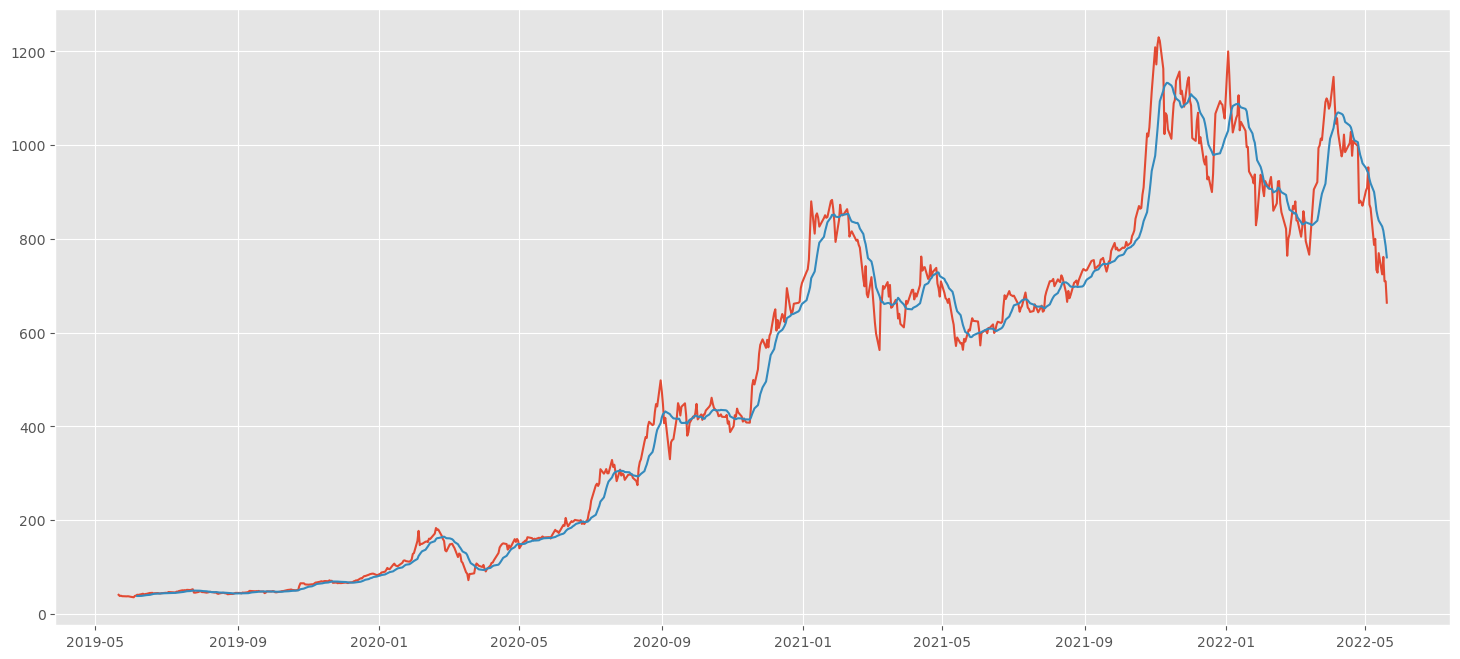

In [29]:
rolmean1=stock_data["Close"].rolling(12).mean()

plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(rolmean1)
plt.show()

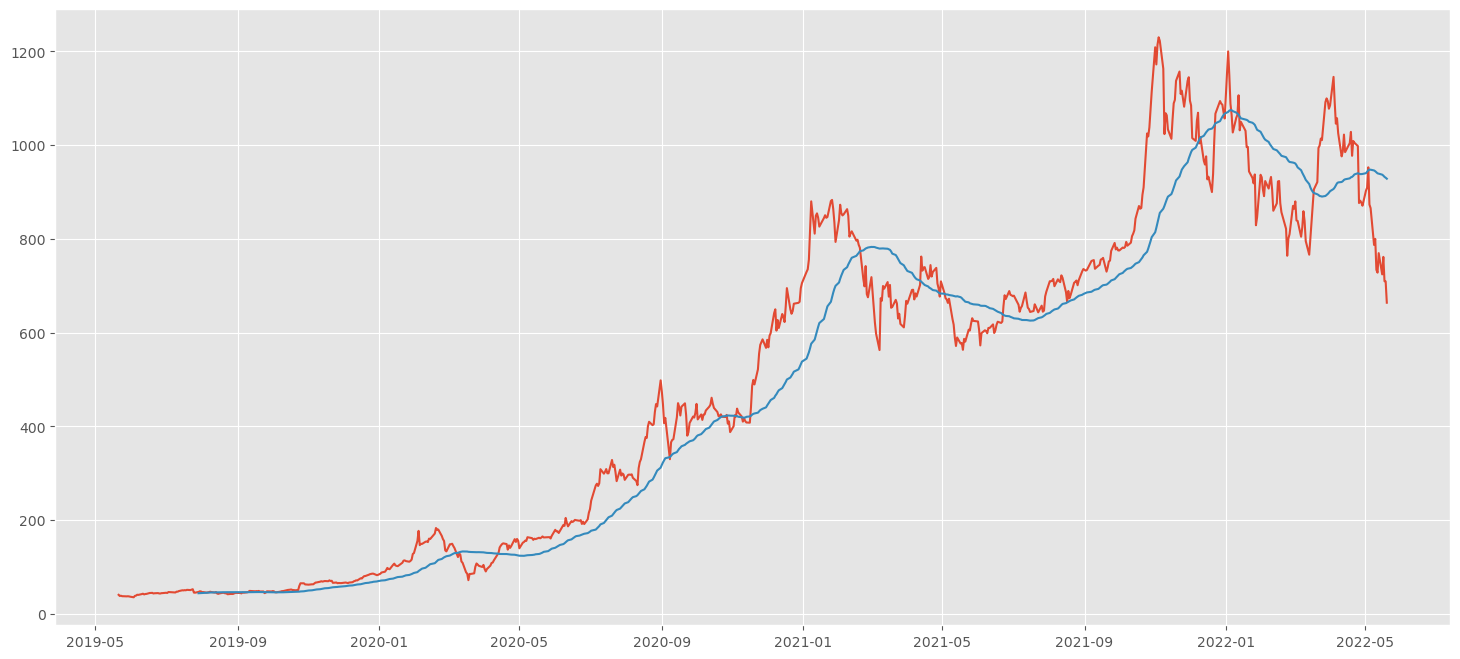

In [30]:
rolmean2=stock_data["Close"].rolling(48).mean()

plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(rolmean2)
plt.show()

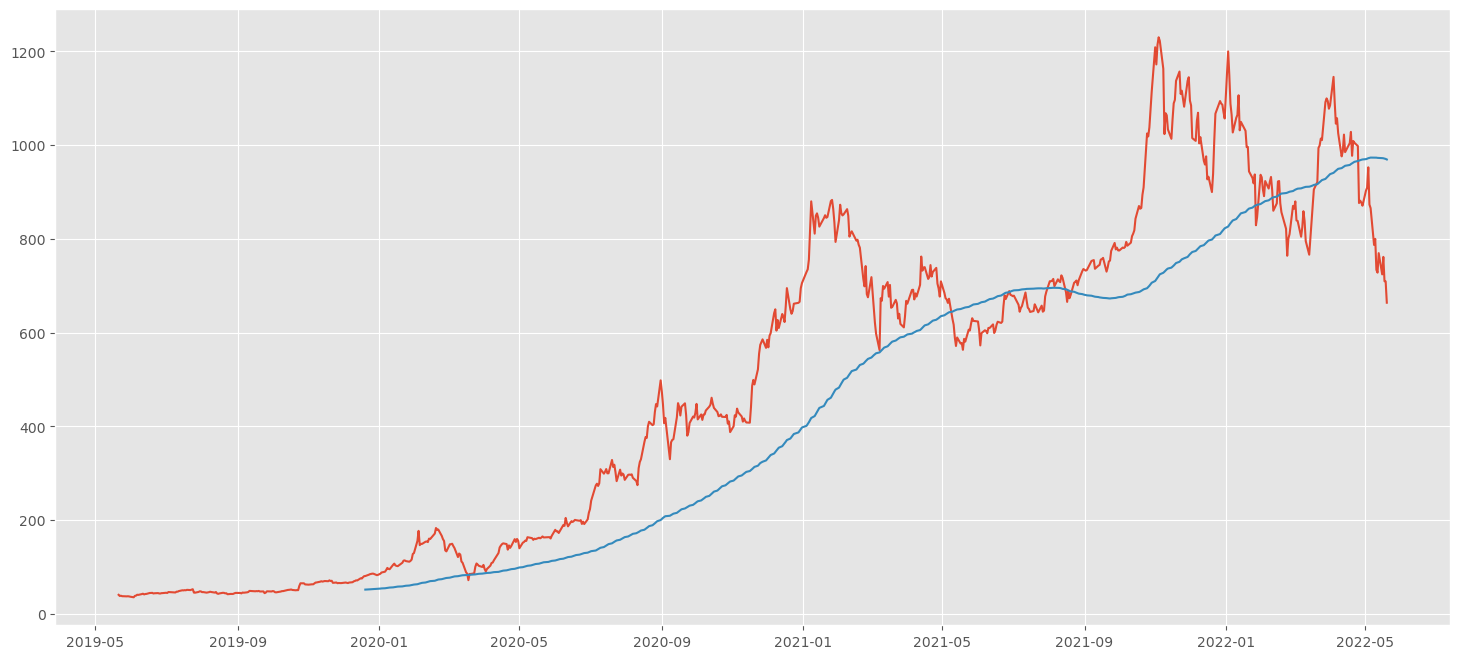

In [31]:
rolmean3=stock_data["Close"].rolling(150).mean()

plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(rolmean3)
plt.show()

# as we increase the window size, curve became smoother

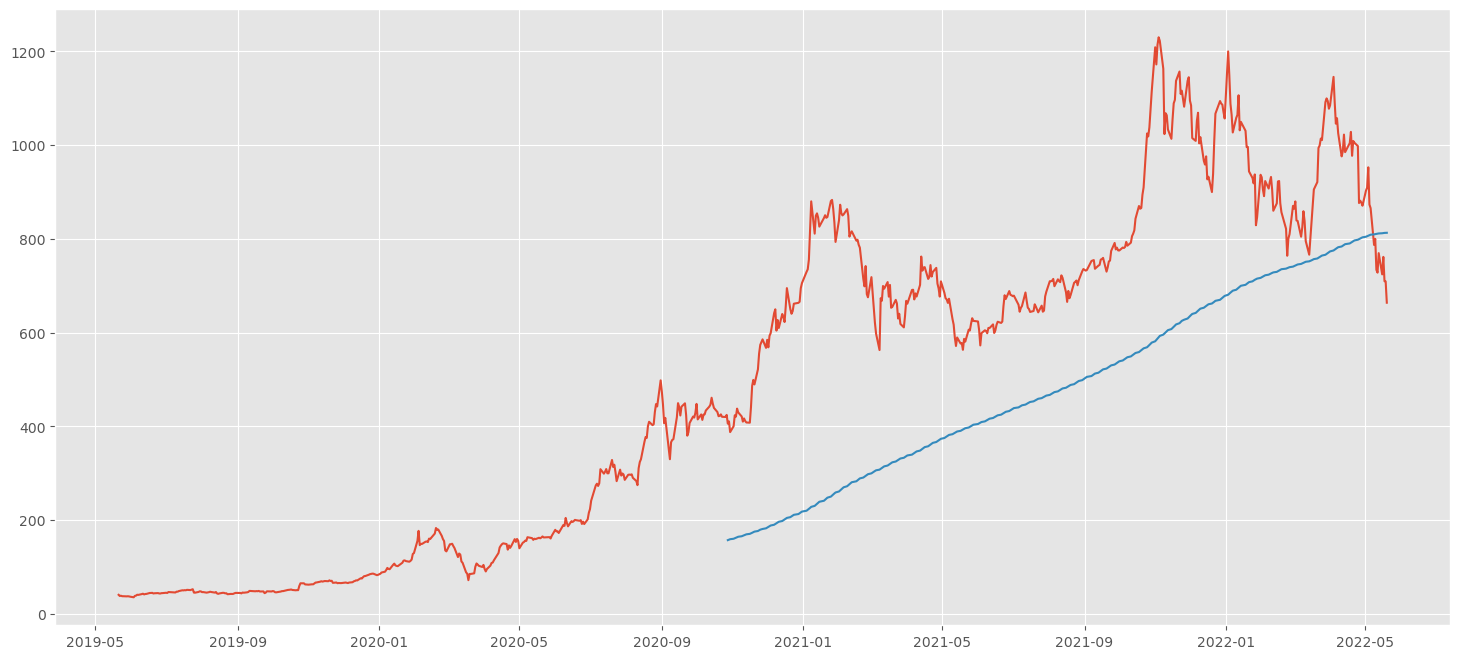

In [28]:
plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.show()

In [32]:
# to identify whether our time series data is stationary or non-stationary
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])

In [33]:
adft

(-1.3630085817037487,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [34]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data point"])

test stats     -1.363009
p-value         0.599876
lag             9.000000
data point    748.000000
dtype: float64

In [37]:
# if we consider confidence interval = 95%
# Ho = My data is non-stationary
# Ha = My data is Stationary
# if p <= 0.05, reject the null hypothesis
# if p > 0.05, accept the null hypothesis, Ho

# here, p = 0.59  => p > 0.05 ==> we have to accept the Ho 
# i.e data is non-stationary

In [35]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

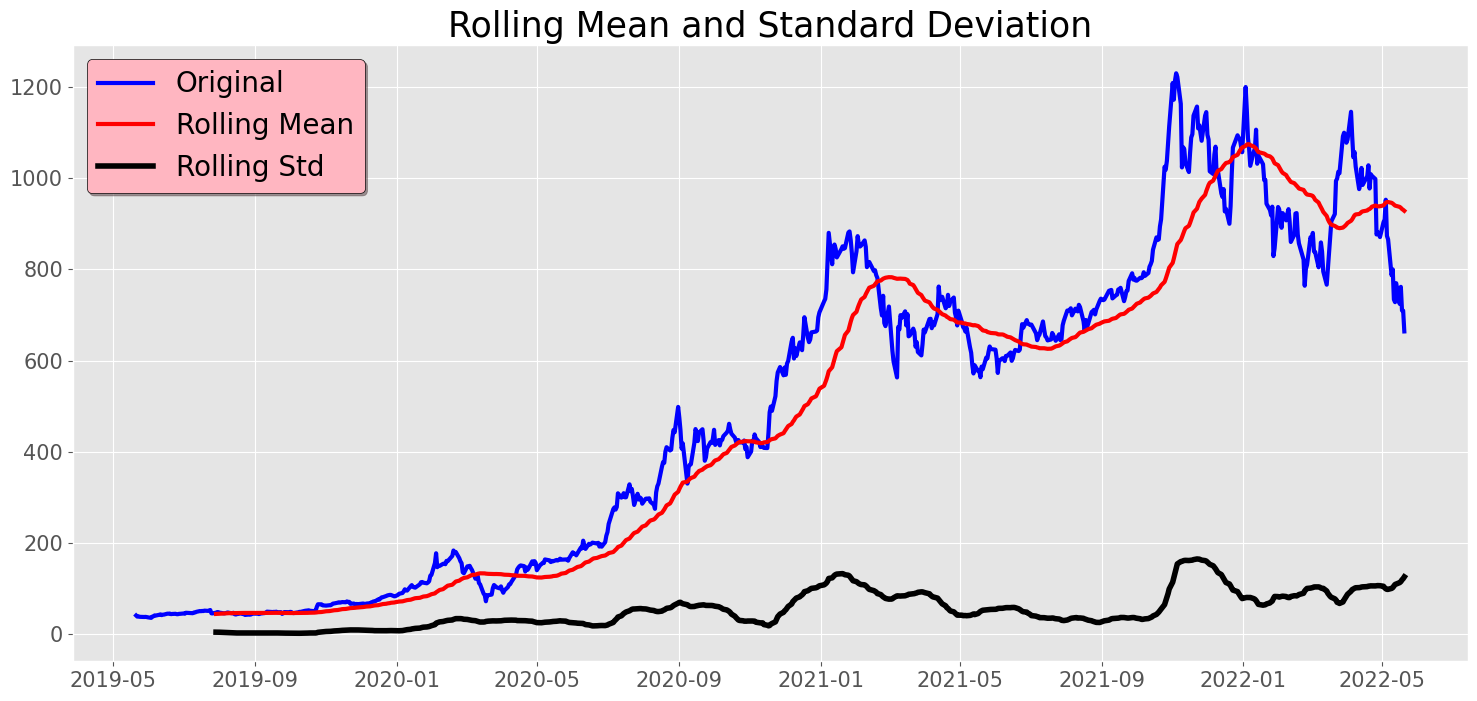

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [36]:
test_stationarity(stock_data.Close)

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data["Close"],model= "multiplicative",period=30)

decomposing a time series into trend, seasonality, and noise components using the seasonal_decompose function

### statsmodels.tsa.seasonal.seasonal_decompose¶

`statsmodels.tsa.seasonal.seasonal_decompose(x, 
    model='additive', 
    filt=None, 
    period=None, 
    two_sided=True, 
    extrapolate_trend=0)`


##### Seasonal decomposition using moving averages.

Parameters¶
- **x**:array_like

Time series. If 2d, individual series are in columns. x must contain 2 complete cycles.

- **model** :{“additive”, “multiplicative”}, optional 

Type of seasonal component. Abbreviations are accepted.

- **filt**: array_like, optional

The filter coefficients for filtering out the seasonal component. The concrete moving average method used in filtering is determined by two_sided.

- **period** :int, optional

Period of the series (eg, 1 for annual, 4 for quarterly, etc). Must be used if x is not a pandas object or if the index of x does not have a frequency. Overrides default periodicity of x if x is a pandas object with a timeseries index.

- **two_sided** :bool, optional

The moving average method used in filtering. If True (default), a centered moving average is computed using the filt. If False, the filter coefficients are for past values only.

- **extrapolate_trend** : int or ‘freq’, optional

If set to > 0, the trend resulting from the convolution is linear least-squares extrapolated on both ends (or the single one if two_sided is False) considering this many (+1) closest points. If set to ‘freq’, use freq closest points. Setting this parameter results in no NaN values in trend or resid components.

returns - 
A object with seasonal, trend, and resid attributes.

<Figure size 2000x1000 with 0 Axes>

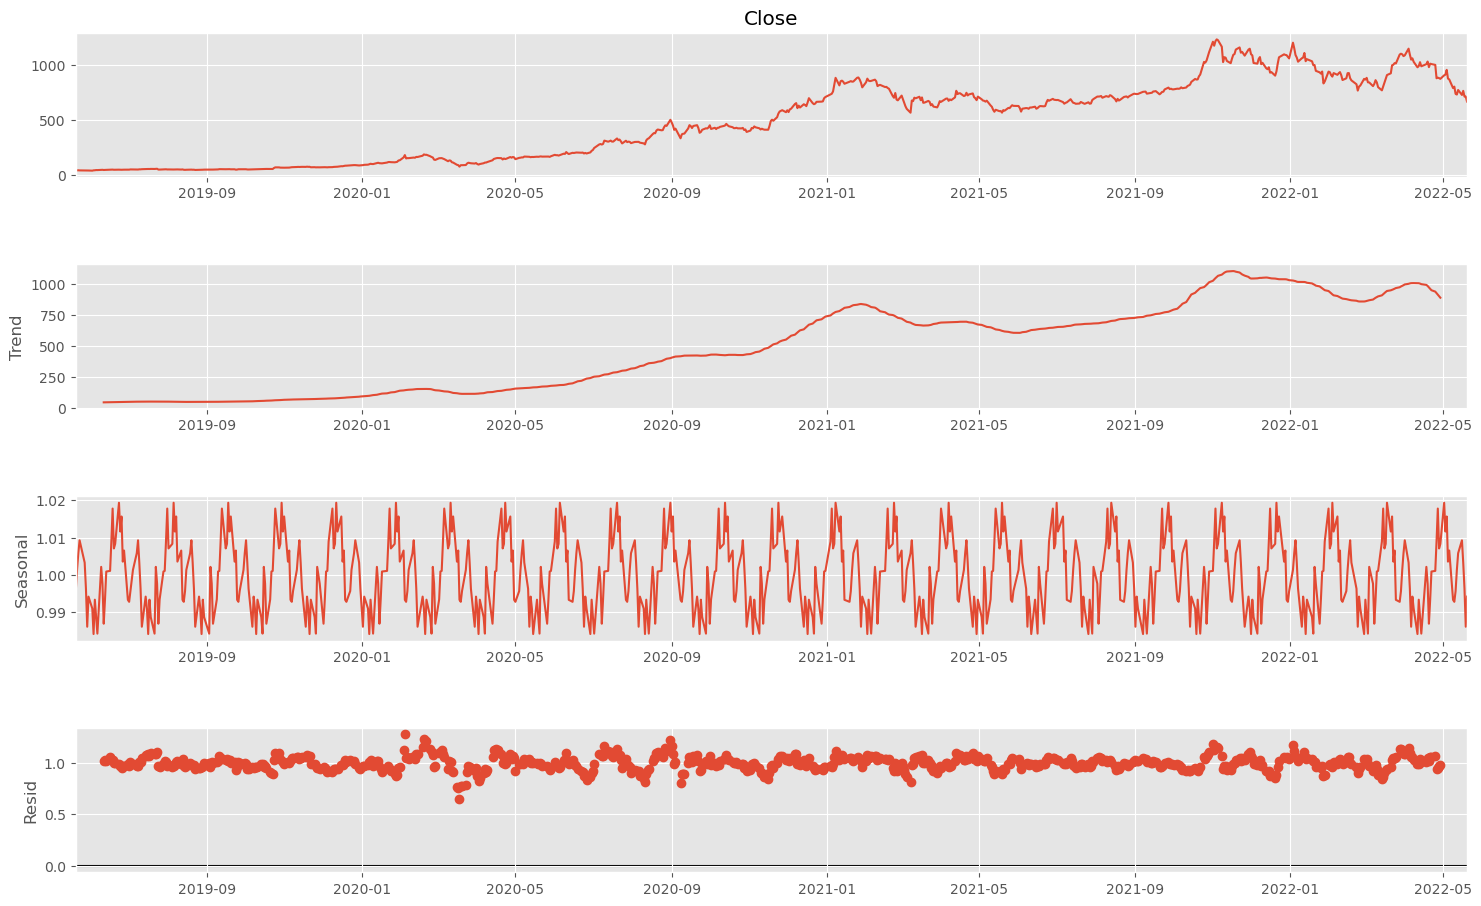

In [39]:
plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [41]:
result.seasonal

Date
2019-05-21    0.995645
2019-05-22    1.001321
2019-05-23    1.005804
2019-05-24    1.009275
2019-05-28    1.003281
                ...   
2022-05-16    1.009275
2022-05-17    1.003281
2022-05-18    0.996281
2022-05-19    0.986065
2022-05-20    0.994151
Name: seasonal, Length: 758, dtype: float64

In [42]:
result.resid

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: resid, Length: 758, dtype: float64

In [43]:
result.trend

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: trend, Length: 758, dtype: float64

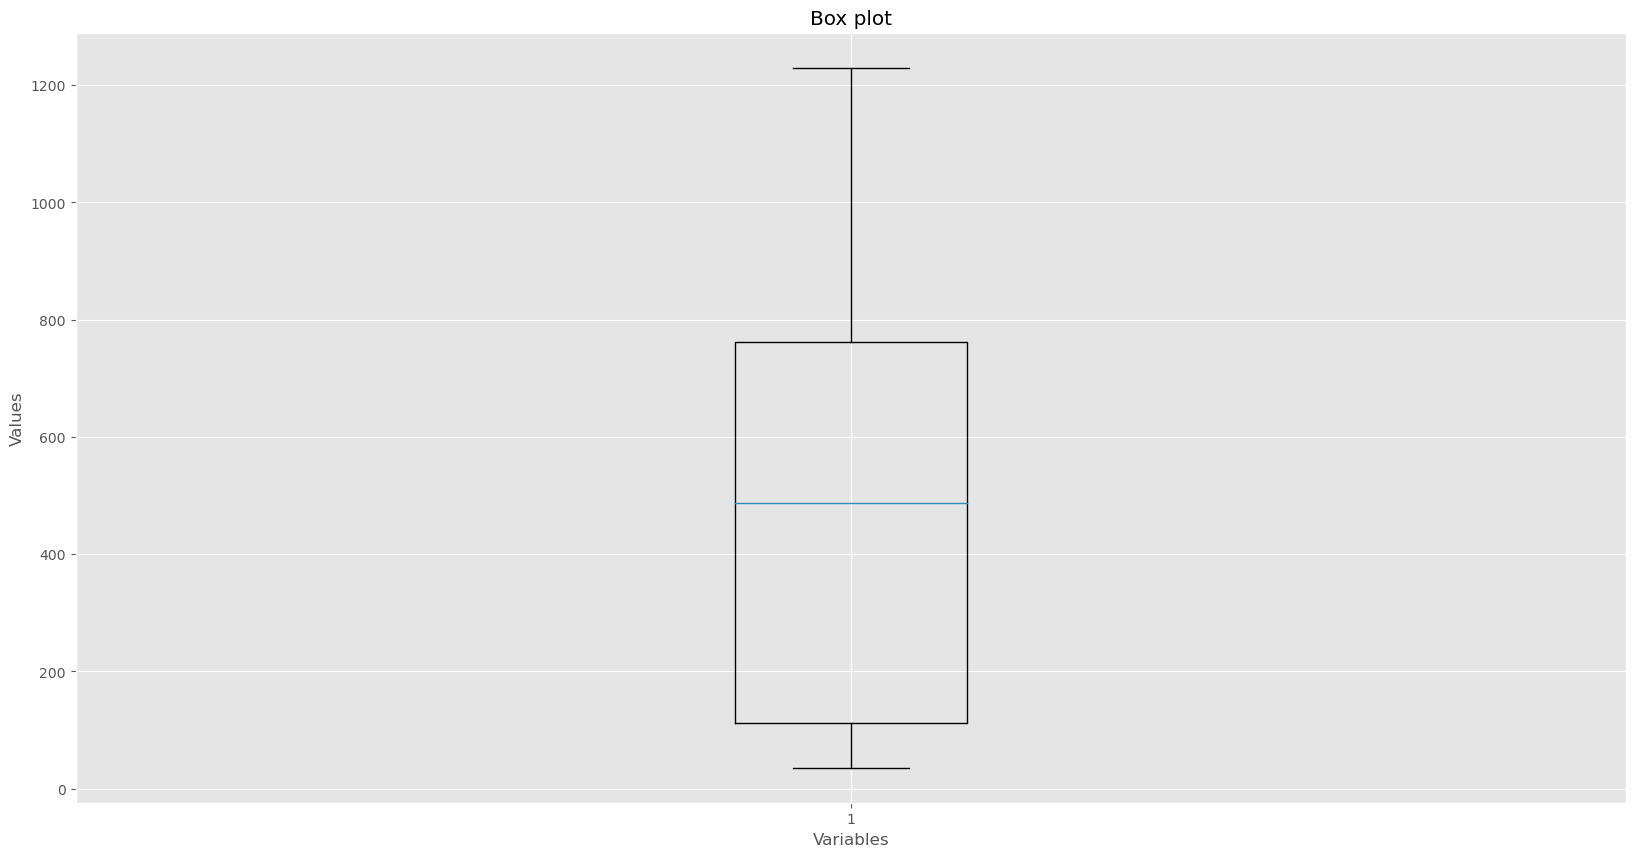

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
# Plot the box plot
ax.boxplot(stock_data["Close"])
# Set the x-axis label
ax.set_xlabel('Variables')
# Set the y-axis label
ax.set_ylabel('Values')
# Set the title
ax.set_title('Box plot')
# Show the plot
plt.show()

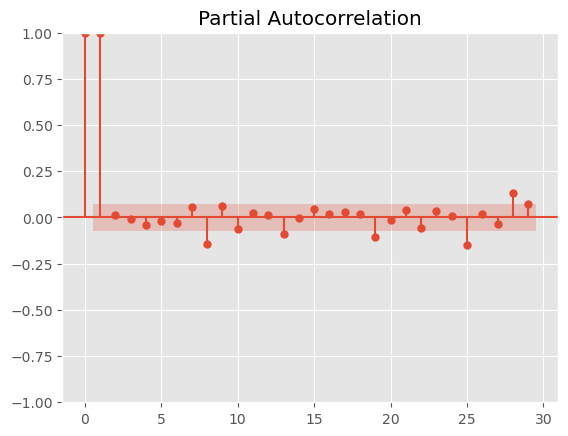

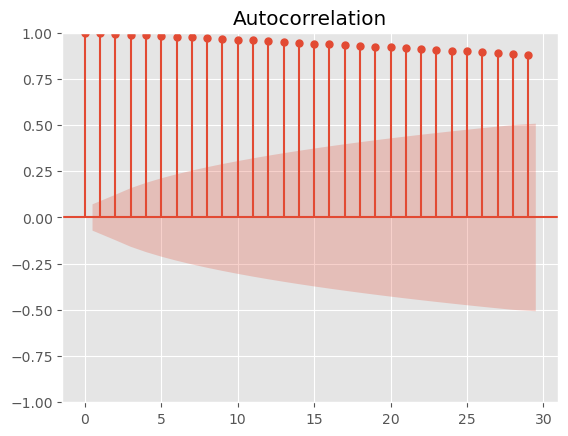

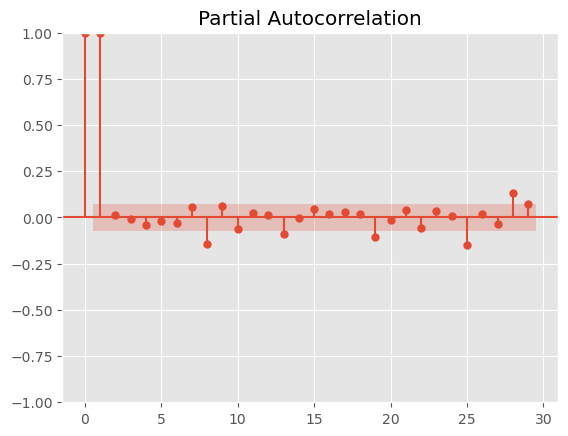

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

# Preprocessing of the data

1. fill the miss(here not required)

2. convert data into the stationary time series

3. if necessary then normalize the data(here not required)

4. split the data into train and test

5. clean the data by removing the outlier(here not required)

In [46]:
df_close=stock_data["Close"]

In [47]:
df_close.diff()

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

In [48]:
df_close.diff(2)

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23    -1.917999
2019-05-24    -0.420002
2019-05-28    -1.357998
                ...    
2022-05-16    -3.630005
2022-05-17    -7.980042
2022-05-18   -14.559998
2022-05-19   -52.190002
2022-05-20   -45.909973
Name: Close, Length: 758, dtype: float64

In [49]:
df_close.diff(3)

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23          NaN
2019-05-24    -2.889999
2019-05-28    -0.806000
                ...    
2022-05-16    -9.630005
2022-05-17    33.609985
2022-05-18   -59.780029
2022-05-19   -14.950012
2022-05-20   -97.709961
Name: Close, Length: 758, dtype: float64

In [50]:
tsla_close_diff_1=df_close.diff()

In [51]:
tsla_close_diff_1=tsla_close_diff_1.dropna()

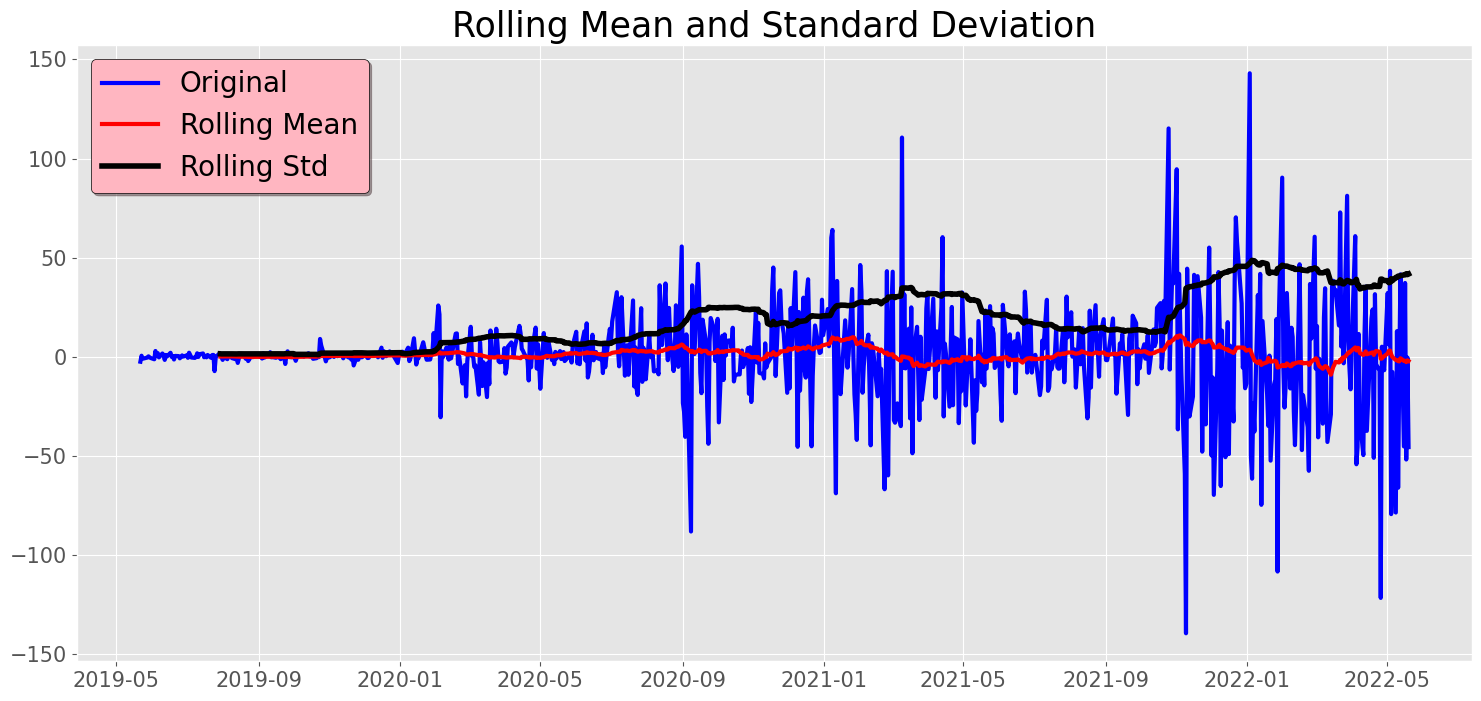

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [52]:
test_stationarity(tsla_close_diff_1)

In [57]:
# p - value < 0, ==> p < 0.05 
# reject the Ho i.e the time series data is stationary

In [58]:
df_close.diff(2)

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23    -1.917999
2019-05-24    -0.420002
2019-05-28    -1.357998
                ...    
2022-05-16    -3.630005
2022-05-17    -7.980042
2022-05-18   -14.559998
2022-05-19   -52.190002
2022-05-20   -45.909973
Name: Close, Length: 758, dtype: float64

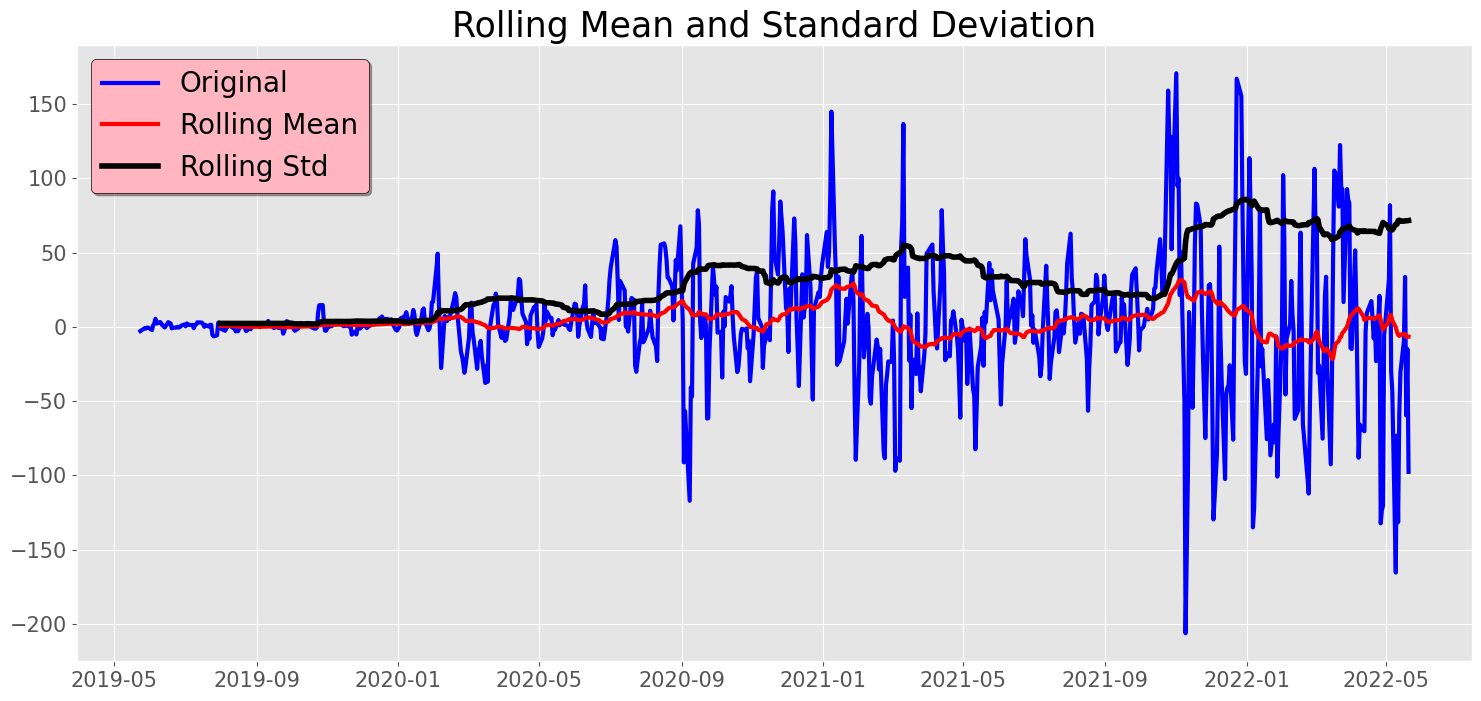

Results of dickey fuller test
Test Statistics               -5.697365e+00
p-value                        7.817959e-07
No. of lags used               1.900000e+01
Number of observations used    7.350000e+02
critical value (1%)           -3.439278e+00
critical value (5%)           -2.865480e+00
critical value (10%)          -2.568868e+00
dtype: float64


In [59]:
tsla_close_diff_3=df_close.diff(3)
tsla_close_diff_3=tsla_close_diff_3.dropna()
test_stationarity(tsla_close_diff_3)

In [60]:
# p - value < 0, ==> p < 0.05 
# reject the Ho i.e the time series data is stationary

In [61]:
train_data=df_close[0:-60]
test_data=df_close[-60:]

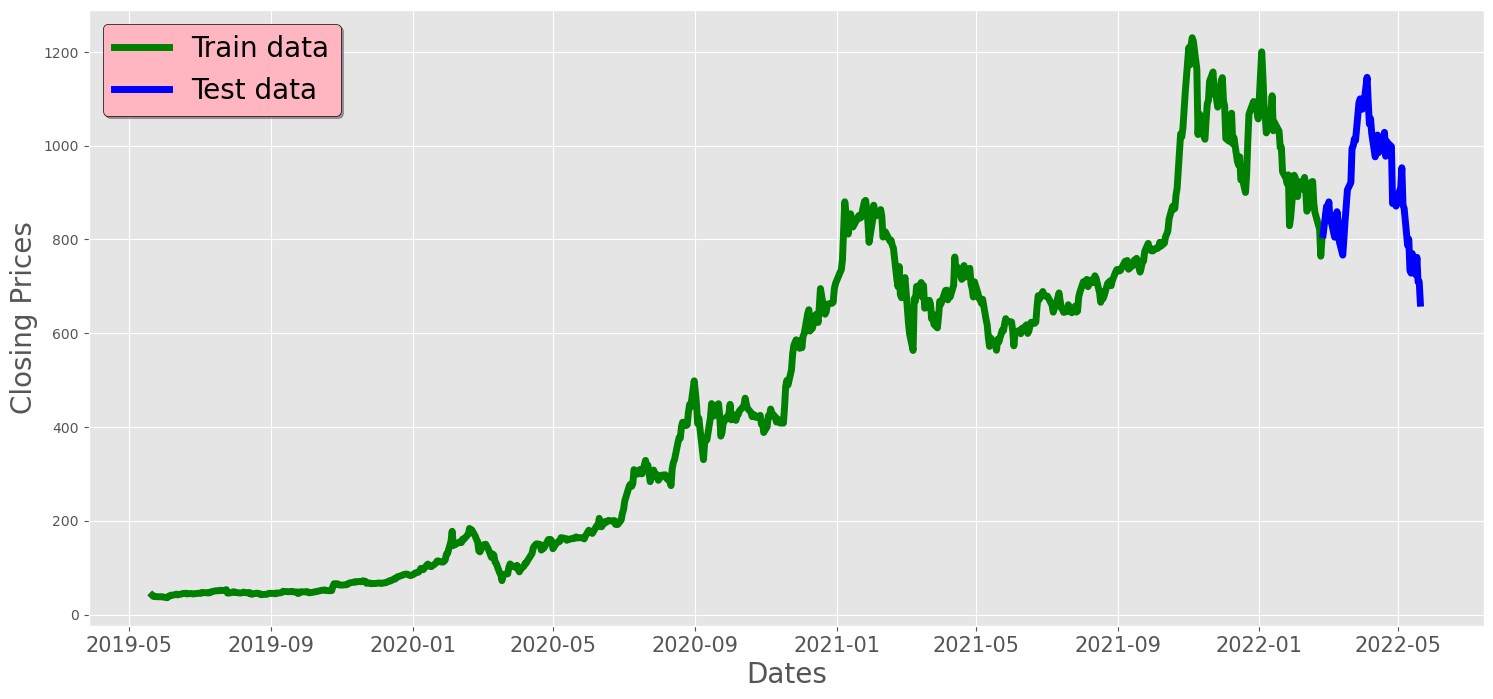

In [62]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [71]:
from statsmodels.tsa.arima.model import ARIMA

In [72]:
# from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [73]:
history=[x for x in train_data]

In [90]:
model=ARIMA(history,order=(1,1,1)) #order = (AR,I,MA)

In [91]:
model=model.fit()

In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Thu, 20 Jun 2024   AIC                           6306.700
Time:                        16:30:43   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
model.forecast()

array([800.20438328])

In [96]:
test_data[0]

809.8699951171875

In [97]:
mean_squared_error([test_data[0]],[model.forecast()[0]])

93.42405216417569

In [98]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [99]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [100]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.164
ARIMA(0, 0, 2) RMSE=178.233
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.580
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.581
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.629
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.739
ARIMA(2, 2, 2) RMSE=39.732
Best ARIMA(2, 0, 0) RMSE=39.440


In [101]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
for p in p_values:
        for d in d_values:
            for q in q_values:
                print(p,d,q)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [110]:
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05) #forecasted value, standard error,coefficient
    predictions.append(fc)
#     conf_list.append(conf)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 39.439912696321095


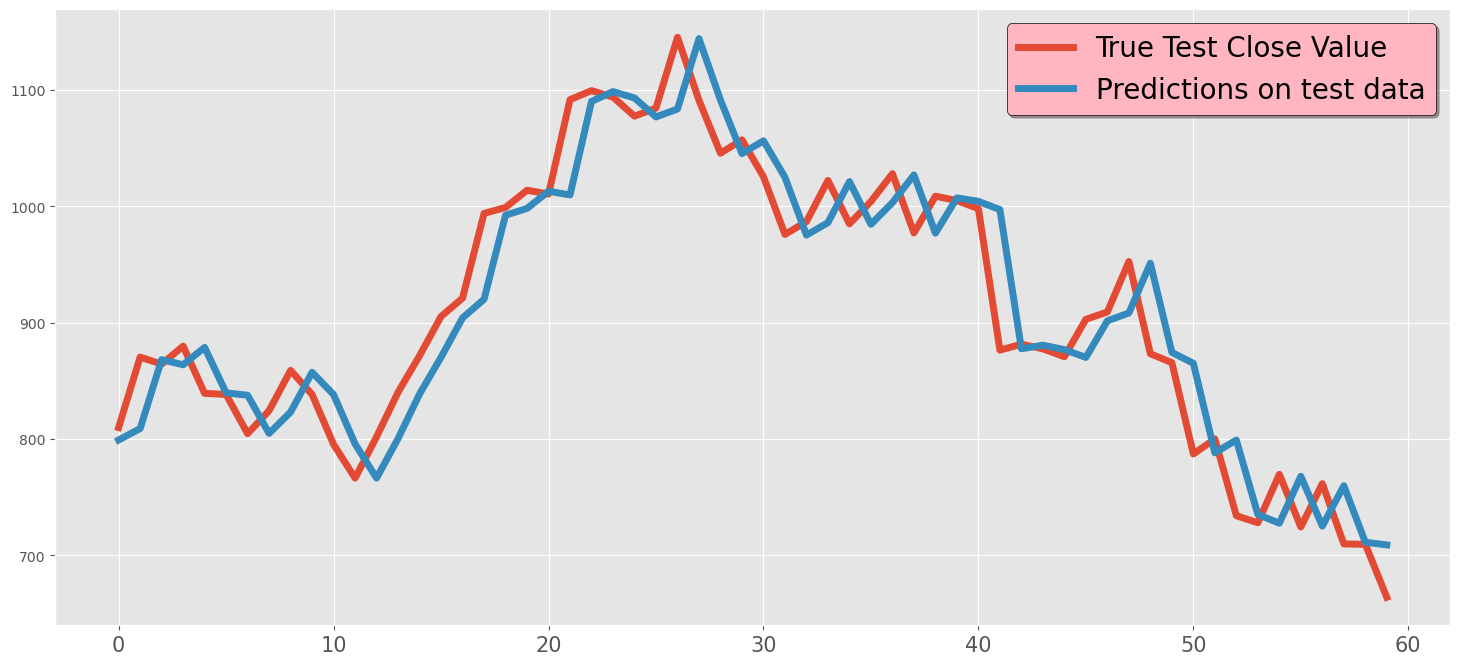

In [104]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [105]:
import statsmodels.api as sm
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=sm.tsa.statespace.SARIMAX(history,order=(0,1,0),seasonal_order=(1,1,1,3))
    model_fit=model.fit()
    fc=model_fit.forecast(alpha=0.05)
    predictions.append(fc)
#     conf_list.append(conf)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 39.739481843974595


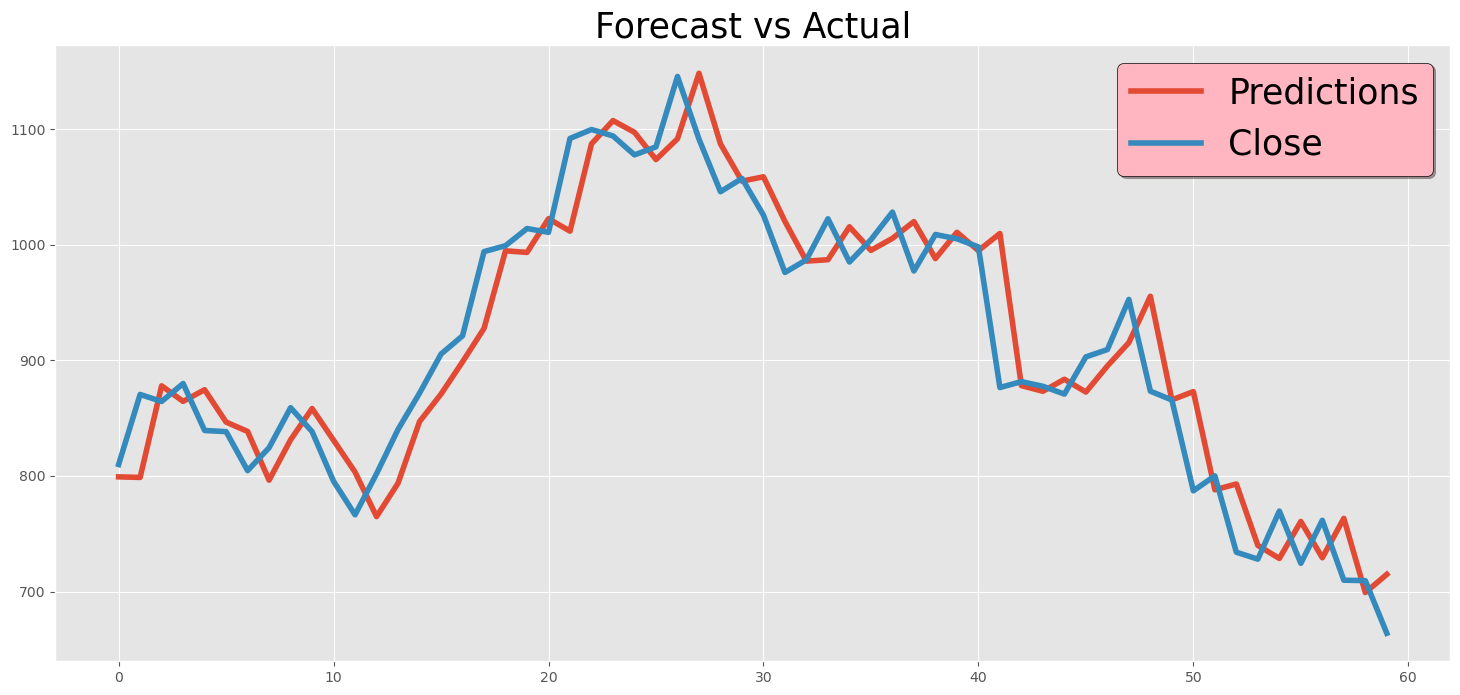

In [106]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [107]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

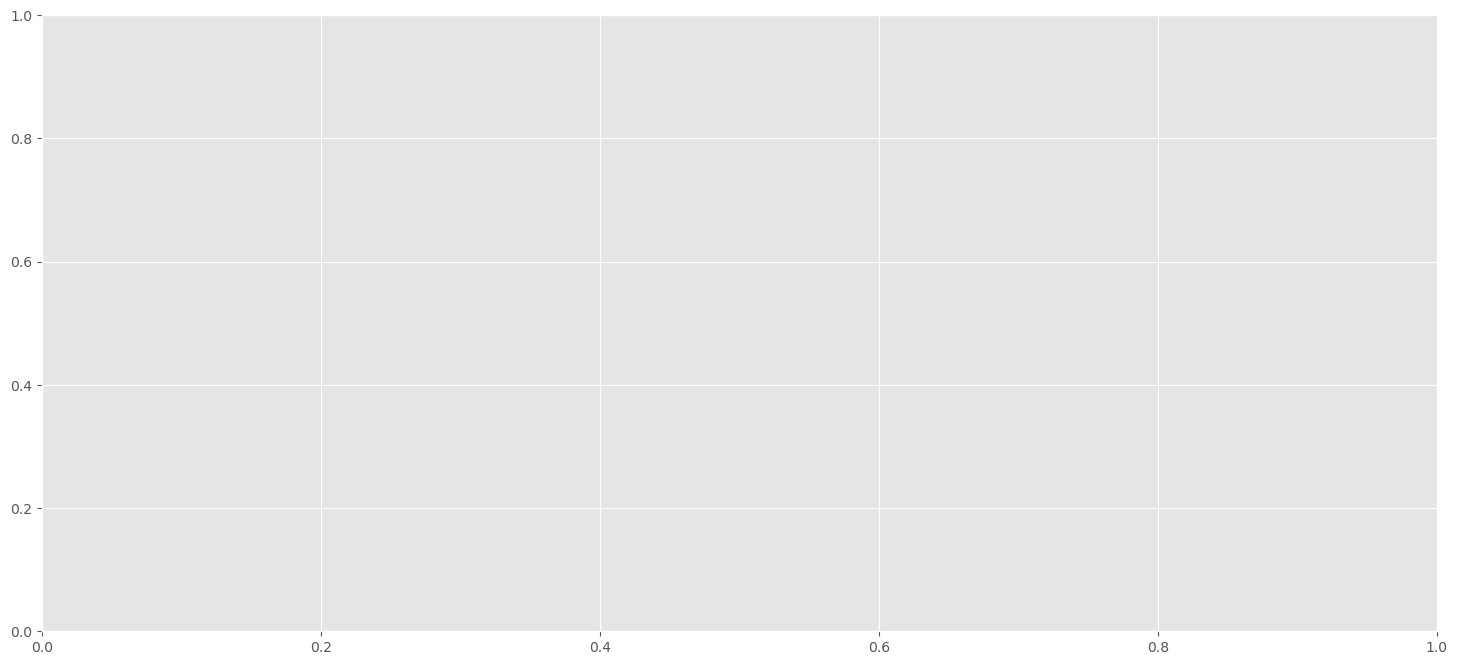

In [111]:
fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(111)
model_fit.plot_predict(start=1,end=len(df_close)+365,ax=ax1)
plt.grid("both")
plt.legend(["forecast","close","95% confidence interval"],fontsize=20,shadow=True,facecolor="lightblue",edgecolor="k")
plt.show()